# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Salah satu faktor yang mempengaruhi kuatnya ekonomi suatu negara adalah nilai tukar mata uang (kurs). Pada beberapa kasus yang terjadi di negara maju seperti Eropa atau Amerika, nilai tukar mata uang merupakan bagian yang sangat vital, hingga berpengaruh menghambat perdagangan internasional. Tidak terkecuali di Indonesia, yang menganut sistem pasar penuh/bebas (free floating system) dimana nilai tukar rupiah terhadap mata uang asing khususnya dolar (USD) ditentukan oleh pasar mekanisme global. Kebijakan pemerintah dalam menguatkan nilai tukar rupiah perlu dilakukan mengingat dalam 10 tahun terakhir mengalami kemunduran dari titik 9.087 di tahun 2010 menuju titik 14.000 di awal tahun 2022, sehingga ke depannya perlu dilakukan perencanaan fiskal yang fokus, teliti dan tepat. Maka, perlu dilakukan analisis dan visualisasi data untuk membantu perencanaan tersebut.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [179]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [180]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [181]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. Di sini dilakukan pencarian key yang sesuai untuk scrapping data dan mengekstrak informasi yang akurat. Pada website dilakukan Inspect Element untuk mencari key yang sesuai pada tabel Kurs USD ke Rupiah.

In [182]:
table = soup.find('table', attrs={'class': 'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    1/6/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/1-6-2022">
     14,387.13904
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/1-6-2022">
     USD IDR rate for 1/6/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    1/5/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


Finding row length.

In [183]:
row = table.find_all('td')
row_length = len(row)
row_length

516

# Proses Scrapping
Mengambil kolom Tanggal dan kolom Harga pada tabel

In [184]:
#initiating a tuple
tanggal_temp = []
harga_temp = []

for i in range(0, row_length):

    #scrapping process
    
    #get tanggal
    if i in range (0, row_length, 4):
        tanggal = tanggal_temp.append(row[i].get_text())
    
    #get harga 
    if i in range (2, row_length, 4):
        harga = harga_temp.append(row[i].get_text())

In [185]:
tanggal_temp = tanggal_temp[::-1]
harga_temp = harga_temp[::-1]

## Creating data frame & Data wrangling

# Proses Data Wrangling
1. Melakukan import library pandas
2. Meletakkan array Tanggal dan Hari ke Dataframe
3. Mengecek tipe data dari tiap kolom menggunakan metode .dtypes
4. Melakukan pengubahan format dari kolom Harga agar dapat diubah tipe datanya menjadi float
5. Mengubah tipe data Tanggal menjadi datetime dan Harga menjadi float

Put the array into dataframe

In [186]:
import pandas as pd

df = pd.DataFrame()
df['Tanggal'] = tanggal_temp
df['Harga'] = harga_temp
df.head()

,Tanggal,Harga
0,7/12/2021,"14,491.59294 IDR"
1,7/13/2021,"14,476.52203 IDR"
2,7/14/2021,"14,404.17703 IDR"
3,7/15/2021,"14,469.95831 IDR"
4,7/16/2021,"14,495.41215 IDR"


In [187]:
df.dtypes

Tanggal    object
Harga      object
dtype: object

In [188]:
df['Harga'] = df['Harga'].str.replace(",","")
df['Harga'] = df['Harga'].str.replace("IDR","")
df['Harga'] = df['Harga'].astype('float64')
df['Tanggal'] = df['Tanggal'].astype('datetime64')

df.dtypes

Tanggal    datetime64[ns]
Harga             float64
dtype: object

In [189]:
df

,Tanggal,Harga
0,2021-07-12,14491.59
1,2021-07-13,14476.52
2,2021-07-14,14404.18
3,2021-07-15,14469.96
4,2021-07-16,14495.41
...,...,...
124,2021-12-31,14184.77
125,2022-01-03,14271.11
126,2022-01-04,14306.22
127,2022-01-05,14376.59


In [190]:
df = df.set_index('Tanggal')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Tanggal'>

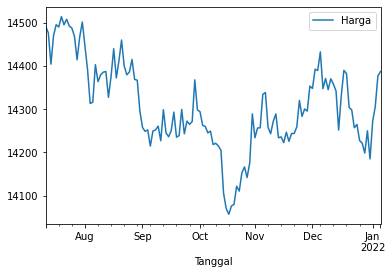

In [191]:
df.plot()

# Analisis dan Kesimpulan Visualisasi Data
1. Sejak bulan Januari 2022, terjadi pelonjakan kurs USD ke Rupiah.
2. Saat ini kurs USD ke Rupiah menduduki angka hampir Rp14400.
3. Pelonjakan kurs USD ke Rupiah terbesar dialami pada pertengahan Bulan Oktober 2021 hingga awal Bulan November 2021.
4. Sejak Bulan Juli 2021 hingga saat ini, angka terendah kurs USD ke Rupiah terjadi pada pertengahan bulan Oktober 2021.
5. Sejak Bulan Juli 2021 hingga saat ini, angka terendah kurs USD ke Rupiah bernilai kurang dari Rp14100.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.